In [102]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

#Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style("darkgrid")

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import collections


from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from scipy.stats import norm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

%matplotlib inline

In [103]:
application_score = pd.read_csv("Scores/application_score.csv")
behavioral_score = pd.read_csv("Scores/behavioral_score.csv")
bureau_score = pd.read_csv("Scores/bureau_score.csv")

In [104]:
application_score.head()

SK_ID_CURR   DEFAULT  TARGET
0      100002  0.808044       1
1      100003  0.061996       0
2      100004  0.075526       0
3      100006  0.093064       0
4      100007  0.056026       0

In [105]:
behavioral_score.head()

SK_ID_CURR  DEFAULT_SCORE  TARGET
0    100002.0       0.318240     1.0
1    100003.0       0.236938     0.0
2    100004.0       0.404841     0.0
3    100006.0       0.194751     0.0
4    100007.0       0.304930     0.0

In [106]:
bureau_score.head()

SK_ID_CURR   DEFAULT  TARGET
0    100002.0  0.697705     1.0
1    100003.0  0.702333     0.0
2    100004.0  0.702333     0.0
3    100006.0  0.702333     0.0
4    100007.0  0.701356     0.0

In [107]:
application_score.shape

(307511, 3)

In [108]:
behavioral_score.shape

(307511, 3)

In [109]:
bureau_score.shape

(307511, 3)

In [110]:
# Merge the data

app_behav_score= pd.merge(application_score,behavioral_score, left_on= ["SK_ID_CURR", "TARGET"], 
                         right_on = ["SK_ID_CURR", "TARGET"],suffixes = ("_APPLICATION", "_BEHAVIOURAL") )

In [111]:
app_behav_score.head()

SK_ID_CURR   DEFAULT  TARGET  DEFAULT_SCORE
0      100002  0.808044       1       0.318240
1      100003  0.061996       0       0.236938
2      100004  0.075526       0       0.404841
3      100006  0.093064       0       0.194751
4      100007  0.056026       0       0.304930

In [112]:
app_behav_bureau_score= pd.merge(app_behav_score,bureau_score, left_on= ["SK_ID_CURR", "TARGET"], 
                         right_on = ["SK_ID_CURR", "TARGET"], suffixes = ("_APPLICATION", "_BUREAU"))

In [113]:
app_behav_bureau_score =app_behav_bureau_score.rename(columns= {"DEFAULT_SCORE":"DEFAULT_SCORE_BUREAU"})

In [114]:
app_behav_bureau_score.head()

SK_ID_CURR  DEFAULT_APPLICATION  TARGET  DEFAULT_SCORE_BUREAU  \
0      100002             0.808044       1              0.318240   
1      100003             0.061996       0              0.236938   
2      100004             0.075526       0              0.404841   
3      100006             0.093064       0              0.194751   
4      100007             0.056026       0              0.304930   

   DEFAULT_BUREAU  
0        0.697705  
1        0.702333  
2        0.702333  
3        0.702333  
4        0.701356

In [115]:
#app_behav_bureau_score["DEFAULT_APPLICATION"] = app_behav_bureau_score["DEFAULT_APPLICATION"].apply(lambda x: 1 if x>=0.5 else 0)
#app_behav_bureau_score["DEFAULT_SCORE_BUREAU"] = app_behav_bureau_score["DEFAULT_SCORE_BUREAU"].apply(lambda x: 1 if x>=0.45 else 0)
#app_behav_bureau_score["DEFAULT_BUREAU"] = app_behav_bureau_score["DEFAULT_BUREAU"].apply(lambda x: 1 if x>=0.5 else 0)

In [116]:
app_behav_bureau_score.shape

(307511, 5)

In [117]:
app_behav_bureau_score.head(20)

SK_ID_CURR  DEFAULT_APPLICATION  TARGET  DEFAULT_SCORE_BUREAU  \
0       100002             0.808044       1              0.318240   
1       100003             0.061996       0              0.236938   
2       100004             0.075526       0              0.404841   
3       100006             0.093064       0              0.194751   
4       100007             0.056026       0              0.304930   
5       100008             0.219908       0              0.207609   
6       100009             0.022552       0              0.299375   
7       100010             0.032940       0              0.297197   
8       100011             0.069505       0              0.207616   
9       100012             0.045194       0              0.302496   
10      100014             0.080394       0              0.321553   
11      100015             0.099154       0              0.401586   
12      100016             0.242025       0              0.329592   
13      100017             0.035712       0              0.308549   
14      100018             0.039889       0              0.174170   
15      100019             0.214826       0              0.322176   
16      100020             0.615178       0              0.389072   
17      100021             0.049741       0              0.214812   
18      100022             0.068653       0              0.432694   
19      100023             0.062276       0              0.256352   

    DEFAULT_BUREAU  
0         0.697705  
1         0.702333  
2         0.702333  
3         0.702333  
4         0.701356  
5         0.702333  
6         0.702333  
7         0.702333  
8         0.702333  
9         0.702333  
10        0.702333  
11        0.702333  
12        0.702333  
13        0.702333  
14        0.702333  
15        0.709141  
16        0.702333  
17        0.702333  
18        0.702333  
19        0.702333

In [118]:
# EDA
app_behav_bureau_score.describe(percentiles=[.25, .5, .75, .90, .95, .99])

SK_ID_CURR  DEFAULT_APPLICATION         TARGET  \
count  307511.000000        307511.000000  307511.000000   
mean   278180.518577             0.167380       0.080729   
std    102790.175348             0.134326       0.272419   
min    100002.000000             0.004929       0.000000   
25%    189145.500000             0.069654       0.000000   
50%    278202.000000             0.126056       0.000000   
75%    367142.500000             0.222840       0.000000   
90%    420729.000000             0.356515       0.000000   
95%    438427.500000             0.452114       1.000000   
99%    452712.900000             0.626053       1.000000   
max    456255.000000             0.892726       1.000000   

       DEFAULT_SCORE_BUREAU  DEFAULT_BUREAU  
count         307511.000000   307511.000000  
mean               0.311689        0.703644  
std                0.064150        0.005034  
min                0.093098        0.590802  
25%                0.280179        0.702333  
50%                0.314681        0.702333  
75%                0.340857        0.702333  
90%                0.404841        0.709141  
95%                0.411402        0.709141  
99%                0.439571        0.737937  
max                0.593581        0.773159

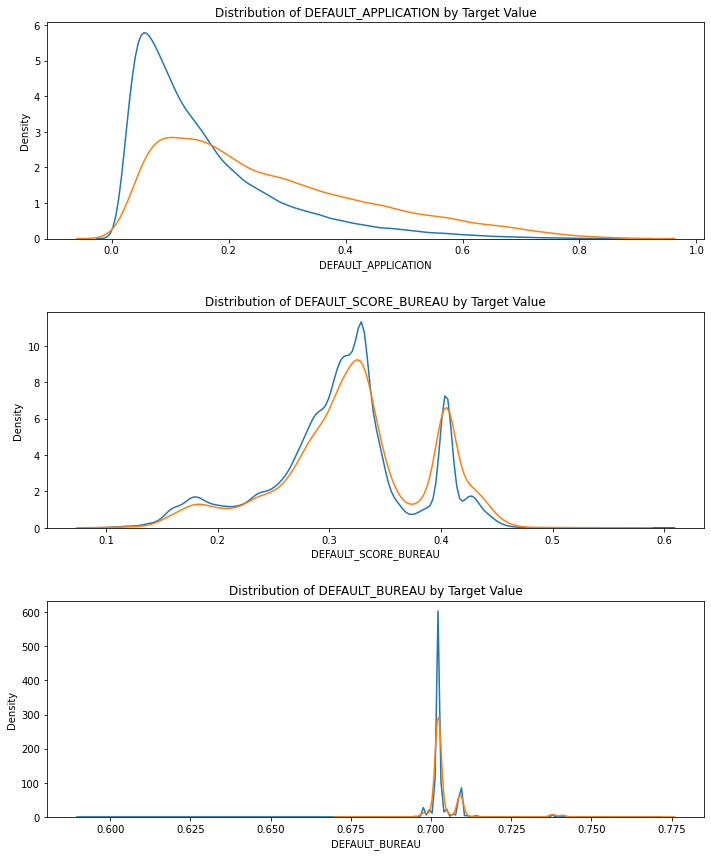

In [119]:
plt.figure(figsize = (10, 12))
for i, source in enumerate(['DEFAULT_APPLICATION', 'DEFAULT_SCORE_BUREAU', 'DEFAULT_BUREAU']):

    plt.subplot(3, 1, i + 1)

    sns.kdeplot(app_behav_bureau_score.loc[app_behav_bureau_score['TARGET'] == 0, source], label = 'target == 0')

    sns.kdeplot(app_behav_bureau_score.loc[app_behav_bureau_score['TARGET'] == 1, source], label = 'target == 1')

    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

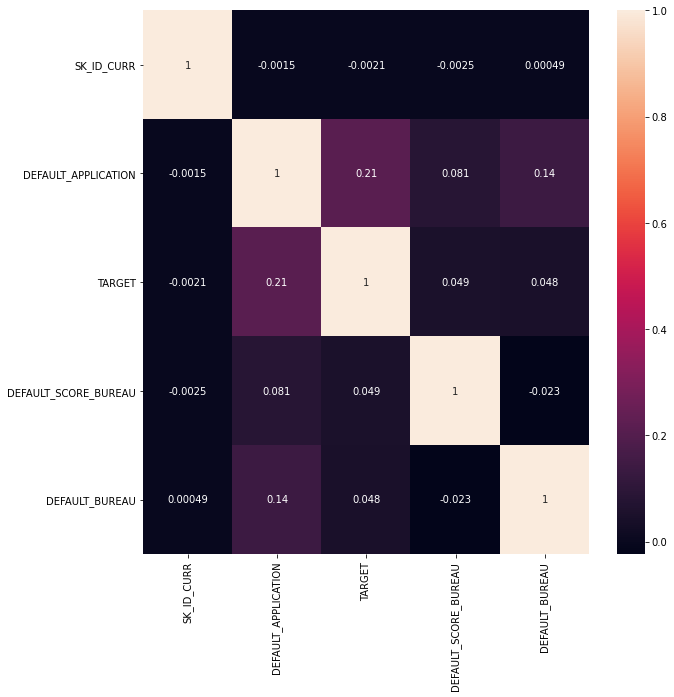

In [120]:
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(app_behav_bureau_score.corr(),annot = True)
plt.show()

In [52]:
poly_features = app_behav_bureau_score[['DEFAULT_APPLICATION', 'DEFAULT_SCORE_BUREAU', 'DEFAULT_BUREAU']]
poly_target = app_behav_bureau_score['TARGET']
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree = 2)

poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
#poly_features_test = poly_transformer.transform(poly_features_test)
print('POLYNOMIAL FEATURES: ', poly_features.shape)


poly_transformer.get_feature_names(input_features = ['DEFAULT_APPLICATION', 'DEFAULT_SCORE_BUREAU', 'DEFAULT_BUREAU'])

POLYNOMIAL FEATURES:  (307511, 10)


['1',
 'DEFAULT_APPLICATION',
 'DEFAULT_SCORE_BUREAU',
 'DEFAULT_BUREAU',
 'DEFAULT_APPLICATION^2',
 'DEFAULT_APPLICATION DEFAULT_SCORE_BUREAU',
 'DEFAULT_APPLICATION DEFAULT_BUREAU',
 'DEFAULT_SCORE_BUREAU^2',
 'DEFAULT_SCORE_BUREAU DEFAULT_BUREAU',
 'DEFAULT_BUREAU^2']

In [54]:
#poly_features["TARGET"] = app_behav_bureau_score["TARGET"]

In [55]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['DEFAULT_APPLICATION', 
                                                                           'DEFAULT_SCORE_BUREAU', 
                                                                           'DEFAULT_BUREAU']))

In [56]:
poly_features

1  DEFAULT_APPLICATION  DEFAULT_SCORE_BUREAU  DEFAULT_BUREAU  \
0       1.0             0.808044              0.318240        0.240917   
1       1.0             0.061996              0.236938        0.093574   
2       1.0             0.075526              0.404841        0.170467   
3       1.0             0.093064              0.194751        0.181375   
4       1.0             0.056026              0.304930        0.239408   
...     ...                  ...                   ...             ...   
307506  1.0             0.272412              0.404841        0.181375   
307507  1.0             0.452654              0.401586        0.181375   
307508  1.0             0.094736              0.401586        0.194398   
307509  1.0             0.129361              0.335953        0.286988   
307510  1.0             0.166781              0.253480        0.192858   

        DEFAULT_APPLICATION^2  DEFAULT_APPLICATION DEFAULT_SCORE_BUREAU  \
0                    0.652936                                  0.257152   
1                    0.003843                                  0.014689   
2                    0.005704                                  0.030576   
3                    0.008661                                  0.018124   
4                    0.003139                                  0.017084   
...                       ...                                       ...   
307506               0.074208                                  0.110283   
307507               0.204896                                  0.181780   
307508               0.008975                                  0.038044   
307509               0.016734                                  0.043459   
307510               0.027816                                  0.042276   

        DEFAULT_APPLICATION DEFAULT_BUREAU  DEFAULT_SCORE_BUREAU^2  \
0                                 0.194672                0.101277   
1                                 0.005801                0.056140   
2                                 0.012875                0.163896   
3                                 0.016879                0.037928   
4                                 0.013413                0.092982   
...                                    ...                     ...   
307506                            0.049409                0.163896   
307507                            0.082100                0.161271   
307508                            0.018416                0.161271   
307509                            0.037125                0.112864   
307510                            0.032165                0.064252   

        DEFAULT_SCORE_BUREAU DEFAULT_BUREAU  DEFAULT_BUREAU^2  
0                                  0.076669          0.058041  
1                                  0.022171          0.008756  
2                                  0.069012          0.029059  
3                                  0.035323          0.032897  
4                                  0.073002          0.057316  
...                                     ...               ...  
307506                             0.073428          0.032897  
307507                             0.072838          0.032897  
307508                             0.078068          0.037791  
307509                             0.096414          0.082362  
307510                             0.048886          0.037194  

[307511 rows x 10 columns]

In [57]:
poly_corrs = poly_features.corr()['TARGET'].sort_values()
poly_corrs

KeyError: 'TARGET'

In [267]:
poly_features['SK_ID_CURR'] = app_behav_bureau_score['SK_ID_CURR']
app_train_poly = app_behav_bureau_score.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [268]:
import re
app_train_poly = app_train_poly.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [269]:
app_train_poly.columns

Index(['SK_ID_CURR', 'DEFAULT_APPLICATION_x', 'TARGET_x',
       'DEFAULT_SCORE_BUREAU_x', 'DEFAULT_BUREAU_x', '1',
       'DEFAULT_APPLICATION_y', 'DEFAULT_SCORE_BUREAU_y', 'DEFAULT_BUREAU_y',
       'DEFAULT_APPLICATION2', 'DEFAULT_APPLICATIONDEFAULT_SCORE_BUREAU',
       'DEFAULT_APPLICATIONDEFAULT_BUREAU', 'DEFAULT_SCORE_BUREAU2',
       'DEFAULT_SCORE_BUREAUDEFAULT_BUREAU', 'DEFAULT_BUREAU2', 'TARGET_y'],
      dtype='object')

In [270]:
poly_corrs = app_train_poly.corr()['TARGET_x'].sort_values()
poly_corrs

SK_ID_CURR                                -0.002108
DEFAULT_SCORE_BUREAU_x                     0.048895
DEFAULT_SCORE_BUREAU_y                     0.048895
DEFAULT_SCORE_BUREAU2                      0.052230
DEFAULT_BUREAU2                            0.052899
DEFAULT_BUREAU_x                           0.060369
DEFAULT_BUREAU_y                           0.060369
DEFAULT_SCORE_BUREAUDEFAULT_BUREAU         0.076553
DEFAULT_APPLICATIONDEFAULT_BUREAU          0.192828
DEFAULT_APPLICATION2                       0.208970
DEFAULT_APPLICATION_x                      0.213849
DEFAULT_APPLICATION_y                      0.213849
DEFAULT_APPLICATIONDEFAULT_SCORE_BUREAU    0.216719
TARGET_x                                   1.000000
TARGET_y                                   1.000000
1                                               NaN
Name: TARGET_x, dtype: float64

In [271]:
app_poly_data = app_train_poly[["SK_ID_CURR", 'DEFAULT_APPLICATION_x', 'TARGET_x', 
                                'DEFAULT_APPLICATIONDEFAULT_SCORE_BUREAU', 'DEFAULT_APPLICATIONDEFAULT_BUREAU']]

In [272]:
app_poly_data.columns = ["SK_ID_CURR", 'DEFAULT_APPLICATION', 'TARGET', 
                                'MULTI_APPLICATION_BEHAVIOUR_SCORE', 'MULTI_APPLICATION_BUREAU_SCORE']

In [273]:
app_poly_data.head()

SK_ID_CURR  DEFAULT_APPLICATION  TARGET  MULTI_APPLICATION_BEHAVIOUR_SCORE  \
0      100002             0.808044       1                           0.257152   
1      100003             0.061996       0                           0.014689   
2      100004             0.075526       0                           0.030576   
3      100006             0.093064       0                           0.018124   
4      100007             0.056026       0                           0.017084   

   MULTI_APPLICATION_BUREAU_SCORE  
0                        0.194672  
1                        0.005801  
2                        0.012875  
3                        0.016879  
4                        0.013413

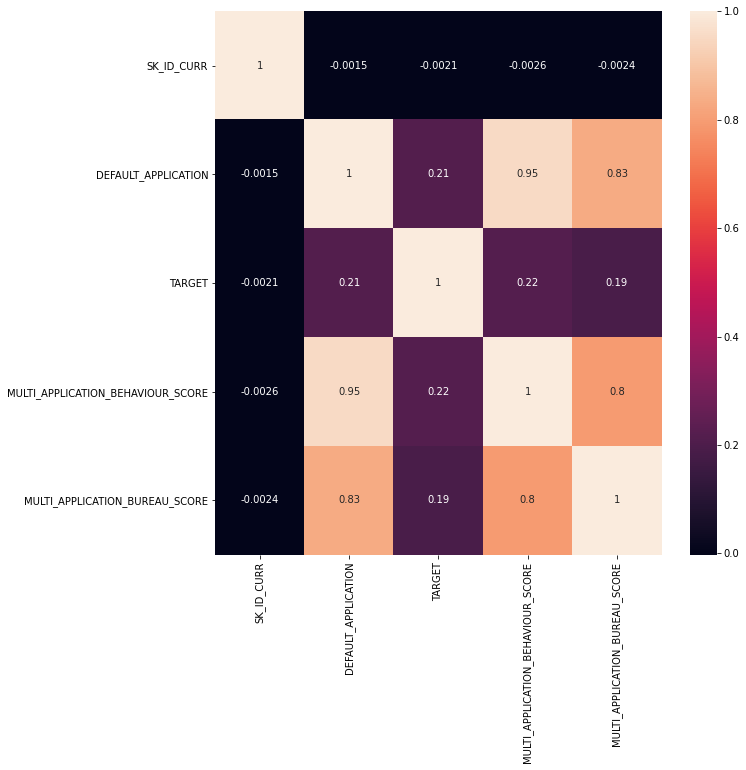

In [274]:
plt.figure(figsize = (10,10))        # Size of the figure
sns.heatmap(app_poly_data.corr(),annot = True)
plt.show()

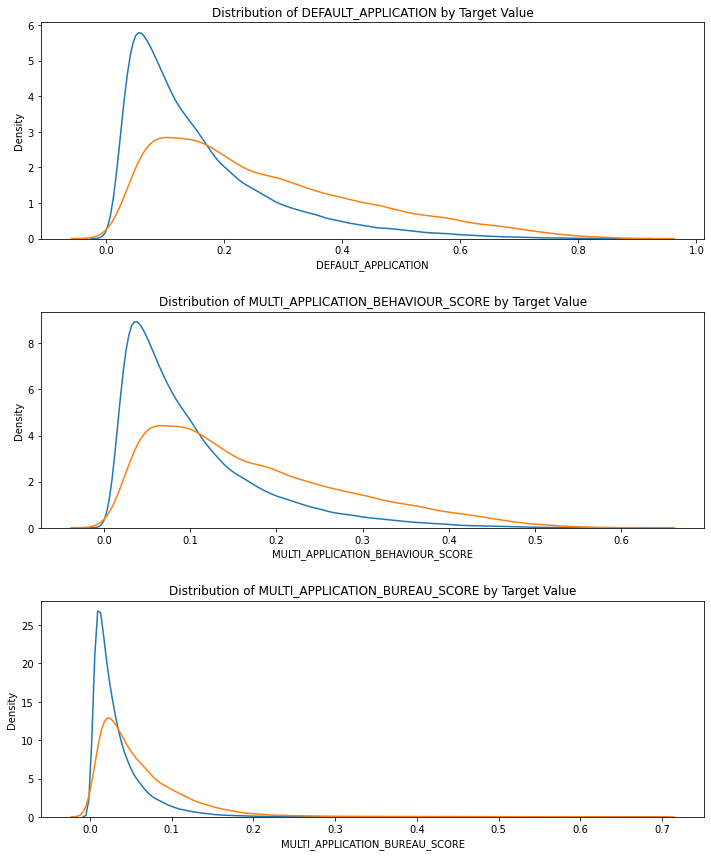

In [55]:
plt.figure(figsize = (10, 12))
for i, source in enumerate([ 'DEFAULT_APPLICATION', 
                                'MULTI_APPLICATION_BEHAVIOUR_SCORE', 'MULTI_APPLICATION_BUREAU_SCORE']):

    plt.subplot(3, 1, i + 1)

    sns.kdeplot(app_poly_data.loc[app_poly_data['TARGET'] == 0, source], label = 'target == 0')

    sns.kdeplot(app_poly_data.loc[app_poly_data['TARGET'] == 1, source], label = 'target == 1')

    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

In [179]:
app_behav_bureau_score = app_behav_bureau_score.drop("DEFAULT_SCORE_BUREAU", axis=1)

In [294]:
app_behav_bureau_score["MULTI_BEH_BUREAU"] = app_behav_bureau_score.apply(lambda x:x["DEFAULT_SCORE_BUREAU"]*x["DEFAULT_BUREAU"], axis=1)

In [58]:
app_behav_bureau_score.head()

SK_ID_CURR  DEFAULT_APPLICATION  TARGET  DEFAULT_SCORE_BUREAU  \
0      100002             0.808044       1              0.318240   
1      100003             0.061996       0              0.236938   
2      100004             0.075526       0              0.404841   
3      100006             0.093064       0              0.194751   
4      100007             0.056026       0              0.304930   

   DEFAULT_BUREAU  
0        0.240917  
1        0.093574  
2        0.170467  
3        0.181375  
4        0.239408

In [296]:
#app_behav_bureau_score = app_behav_bureau_score.drop(['DEFAULT_SCORE_BUREAU', 'DEFAULT_BUREAU'], axis=1)

In [59]:
X = app_behav_bureau_score.drop('TARGET', axis=1)
y = app_behav_bureau_score['TARGET']

In [60]:
X = X.drop("SK_ID_CURR", axis=1)

In [61]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_train

DEFAULT_APPLICATION  DEFAULT_SCORE_BUREAU  DEFAULT_BUREAU
123473             0.167572              0.331773        0.223330
10118              0.274318              0.328643        0.182026
64716              0.036853              0.294410        0.213502
234940             0.078092              0.294453        0.175063
236051             0.103272              0.325464        0.177480
...                     ...                   ...             ...
119879             0.152133              0.440309        0.181375
259178             0.100997              0.245714        0.173674
131932             0.082982              0.351140        0.182212
146867             0.106676              0.293954        0.191887
121958             0.392378              0.404841        0.295091

[246008 rows x 3 columns]

In [301]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train_stand[i] = scale.fit_transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [63]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced',n_jobs=-1)

}

In [66]:
#Calculate the cross-validation score for each classifier 8;24
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        cv_score = cross_val_score(classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
        precision = cross_val_score(classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
        recall = cross_val_score(classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
        auc = cross_val_score(classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
        print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores:-
Logistic Regression: 71.94 : 54.98 : 15.39 : 69.82


In [67]:
 params = {
    "Logistic Regression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
}

In [71]:
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params,n_jobs=-1)
    grid_classifier.fit(X_train, y_train)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [72]:
#Scores after applying Grid Search
hyperparameter_tuned_classfier = dict()
print('Cross-Validation Scores after applying RandomSearch:-')
for key, classifier in classifiers.items():
    tuned_classifier = gridsearch(classifier,params[key])
    hyperparameter_tuned_classfier[key] =tuned_classifier
    cv_score = cross_val_score(tuned_classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
    precision = cross_val_score(tuned_classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
    recall = cross_val_score(tuned_classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
    auc = cross_val_score(tuned_classifier, X_train, y_train, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
    print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores after applying RandomSearch:-
Logistic Regression: 73.06 : 53.1 : 15.64 : 69.88


In [73]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #plt.figure()
    plt.title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

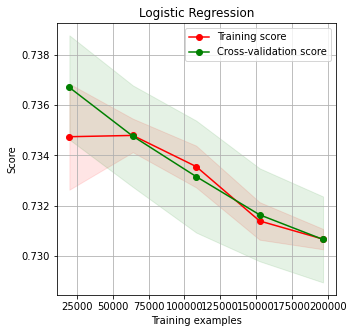

In [76]:
#Variables
n_jobs = 10
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

#Classifiers
log_reg = hyperparameter_tuned_classfier["Logistic Regression"]


#log_reg = randomsearch(LogisticRegression(), params['Logistic Regression'])
#svc = randomsearch(LinearSVC(), params['Support Vector Classifier'])
#decision_tree = randomsearch(DecisionTreeClassifier(), params['Decision Tree'])
#RandomForest = randomsearch(RandomForestClassifier(), params['RandomForest'])
#xgboost = randomsearch(XGBClassifier(), params['Gradient Boosting'])

plt.figure(figsize=(5,5))
plot_learning_curve(log_reg, 'Logistic Regression', X_train, y_train, n_jobs=-1)

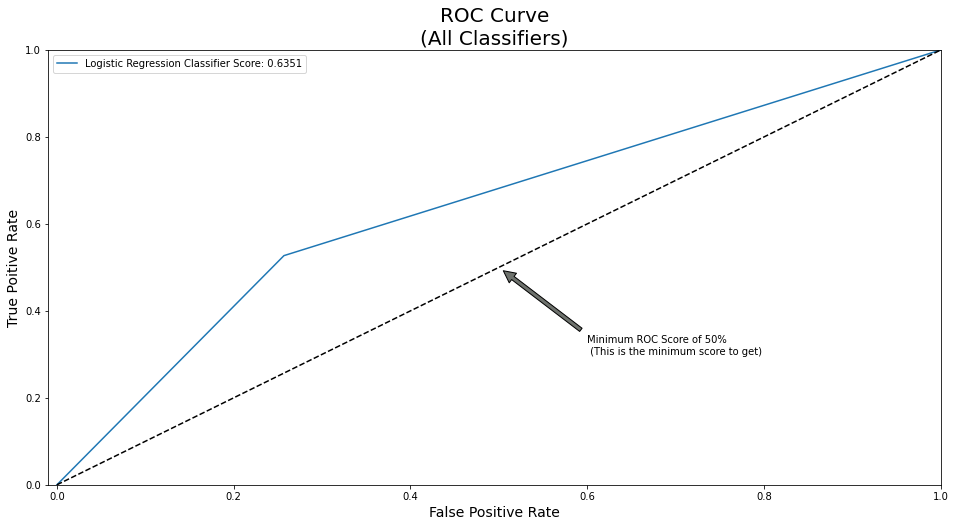

In [78]:
#ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred= log_reg.predict(X_test)
#log_pred = (log_reg.predict_proba(X_test_stand)[:,1] >= 0.1).astype(bool)


log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)

plt.figure(figsize=(16,8))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)))

plt.plot([0,1],[0,1],'k--')
plt.axis([-0.01, 1, 0, 1])

plt.title('ROC Curve\n(All Classifiers)', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Poitive Rate', fontsize=14)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

In [79]:
labels = ['Non-Default', 'Default']

print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))


Logistic Regression:
              precision    recall  f1-score   support

 Non-Default       0.95      0.74      0.83     56554
     Default       0.15      0.53      0.24      4949

    accuracy                           0.73     61503
   macro avg       0.55      0.64      0.53     61503
weighted avg       0.88      0.73      0.78     61503



In [80]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[40202 16352]
 [ 2162  2787]]


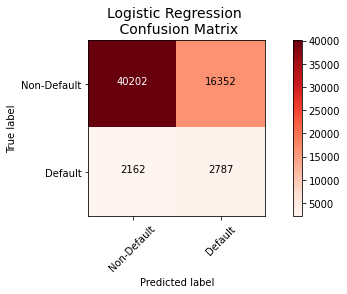

In [100]:
from sklearn.metrics import confusion_matrix
log_reg_cm = confusion_matrix(y_test, (log_reg.predict_proba(X_test)[:,1] >= 0.49).astype(bool))

actual_cm = confusion_matrix(y_test, y_test)
labels = ['Non-Default', 'Default']


fig = plt.figure(figsize=(8,4))
plot_confusion_matrix(log_reg_cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

In [101]:
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1] >= 0.49)

0.6370022430509913

(array([  684.,  2328., 14883., 11091., 23636., 39449., 47522., 56331.,
        34784., 18660.]),
 array([0.07079768, 0.15141068, 0.23202368, 0.31263669, 0.39324969,
        0.47386269, 0.55447569, 0.63508869, 0.7157017 , 0.7963147 ,
        0.8769277 ]),
 <BarContainer object of 10 artists>)

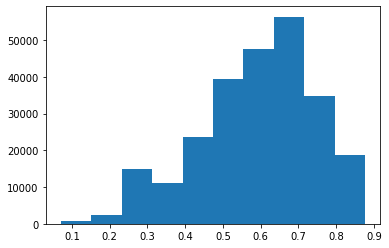

In [18]:
plt.hist(app_behav_bureau_score["DEFAULT_SCORE_APPLICATION"])

(array([ 1557., 15506., 27663., 37111., 43309., 46915., 44452., 26580.,
         6049.,   226.]),
 array([0.06403571, 0.1402838 , 0.21653188, 0.29277997, 0.36902805,
        0.44527614, 0.52152423, 0.59777231, 0.6740204 , 0.75026848,
        0.82651657]),
 <BarContainer object of 10 artists>)

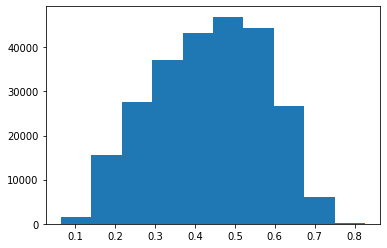

In [19]:
plt.hist(app_behav_bureau_score["DEFAULT_SCORE_BUREAU"])

(array([1.19071e+05, 1.80200e+03, 1.19731e+05, 8.71100e+03, 1.90000e+01,
        1.50000e+01, 1.30000e+01, 3.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([0.00788629, 0.02087145, 0.03385662, 0.04684178, 0.05982695,
        0.07281211, 0.08579727, 0.09878244, 0.1117676 , 0.12475277,
        0.13773793]),
 <BarContainer object of 10 artists>)

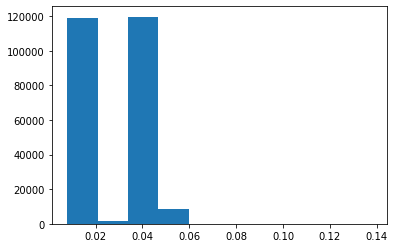

In [20]:
plt.hist(app_behav_bureau_score["DEFAULT_SCORE_BEHAVIOURAL"])
#sns.displot(app_behav_bureau_score, x="DEFAULT_SCORE_BEHAVIOURAL")

In [21]:
X = app_behav_bureau_score.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = app_behav_bureau_score['TARGET']

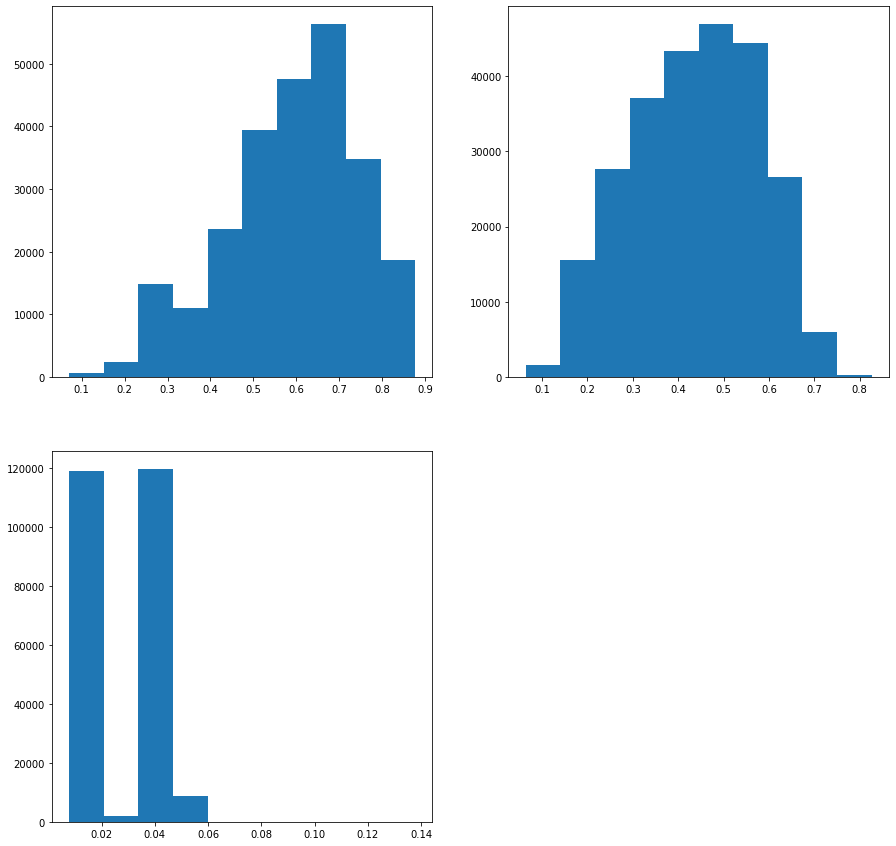

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(X["DEFAULT_SCORE_APPLICATION"])
plt.subplot(2,2,2)
plt.hist(X["DEFAULT_SCORE_BUREAU"])

plt.subplot(2,2,3)
plt.hist(X["DEFAULT_SCORE_BEHAVIOURAL"])

plt.show()


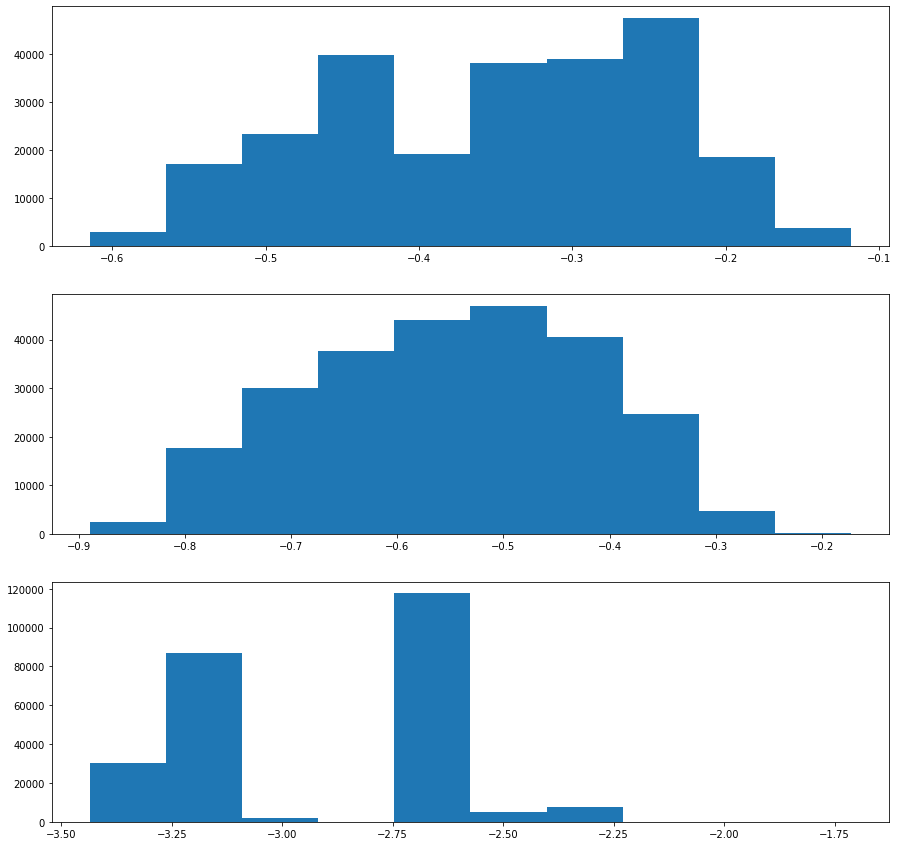

In [23]:
from scipy.stats import boxcox
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
X["DEFAULT_SCORE_APPLICATION"] = boxcox(X["DEFAULT_SCORE_APPLICATION"])[0]
plt.hist(X["DEFAULT_SCORE_APPLICATION"])
plt.subplot(3,1,2)
X["DEFAULT_SCORE_BUREAU"] = boxcox(X["DEFAULT_SCORE_BUREAU"])[0]
plt.hist(X["DEFAULT_SCORE_BUREAU"])
plt.subplot(3,1,3)
X["DEFAULT_SCORE_BEHAVIOURAL"] = boxcox(X["DEFAULT_SCORE_BEHAVIOURAL"])[0]
plt.hist(X["DEFAULT_SCORE_BEHAVIOURAL"])


plt.show()

In [24]:
#Split the data using train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [25]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train_stand[i] = scale.fit_transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [26]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train_stand.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before OverSampling, the shape of train_X: (149620, 3)
Before OverSampling, the shape of train_y: (149620,) 

Before OverSampling, counts of label '1': 11843
Before OverSampling, counts of label '0': 137777


In [27]:
# SMOTE OVERSAMPLING
sm = SMOTE(random_state = 2) 
X_train_SMOTE, y_train_SMOTE = sm.fit_sample(X_train_stand, y_train.ravel()) 

In [28]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_SMOTE == 0))) 

After OverSampling, the shape of train_X: (275554, 3)
After OverSampling, the shape of train_y: (275554,) 

After OverSampling, counts of label '1': 137777
After OverSampling, counts of label '0': 137777


In [29]:
#Convert to arrays to feed to the classifications algorithms
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
    "Support Vector Classifier": LinearSVC(dual=False, random_state=0),
    "Decision Tree": DecisionTreeClassifier(max_depth = 5),
    "RandomForest":RandomForestClassifier(max_depth = 6, n_jobs=-1),
    "Gradient Boosting":XGBClassifier(objective='binary:logistic',max_depth =3, n_estimators=10, eval_metric='logloss', seed=123, n_jobs=-1,verbosity=3)
}

In [30]:
#Calculate the cross-validation score for each classifier 8;24
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
        classifier.fit(X_train_SMOTE, y_train_SMOTE)
        cv_score = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
        precision = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
        recall = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
        auc = cross_val_score(classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
        print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))
    

Cross-Validation Scores:-
Logistic Regression: 56.06 : 57.13 : 55.94 : 58.29
Support Vector Classifier: 56.07 : 57.16 : 55.95 : 58.29
Decision Tree: 87.75 : 87.56 : 87.96 : 87.9
RandomForest: 62.21 : 69.03 : 60.81 : 68.83
[15:30:20] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/gbm/gbtree.cc:154: Using tree method: 2
[15:30:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:30:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:30:20] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:30:21] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_pr

In [31]:
 params = {
    "Logistic Regression": {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1]},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "RandomForest": {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))},
     "Gradient Boosting":{
     "eta"    : [0.05, 0.10, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5],
     "gamma"            : [ 0.1, 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
     }

}

In [32]:
#Using Grid search for finding the most optimal hyperparameters
def randomsearch(classifier, params):
    k = StratifiedKFold(n_splits=10)
    grid_classifier = RandomizedSearchCV(classifier, params, cv = k, n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [33]:
#Using Grid search for finding the most optimal hyperparameters
def gridsearch(classifier, params):
    grid_classifier = GridSearchCV(classifier, params,n_jobs=-1)
    grid_classifier.fit(X_train_SMOTE, y_train_SMOTE)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier

In [34]:
#Scores after applying Grid Search
hyperparameter_tuned_classfier = dict()
print('Cross-Validation Scores after applying RandomSearch:-')
for key, classifier in classifiers.items():
    tuned_classifier = randomsearch(classifier,params[key])
    hyperparameter_tuned_classfier[key] =tuned_classifier
    cv_score = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='accuracy',n_jobs=-1)
    precision = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='precision',n_jobs=-1)
    recall = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='recall',n_jobs=-1)
    auc = cross_val_score(tuned_classifier, X_train_SMOTE, y_train_SMOTE, cv=StratifiedKFold(shuffle = True),scoring='roc_auc',n_jobs=-1)
    print('{}: {} : {} : {} : {}'.format(key,round(cv_score.mean()*100.0, 2),
                                     round(recall.mean()*100.0, 2),
                                     round(precision.mean()*100.0, 2),
                                     round(auc.mean()*100.0, 2),))

Cross-Validation Scores after applying RandomSearch:-
Logistic Regression: 56.08 : 57.14 : 55.95 : 58.29
Support Vector Classifier: 56.06 : 57.16 : 55.94 : 58.28
Decision Tree: 57.64 : 74.41 : 55.6 : 59.56
RandomForest: 59.46 : 62.88 : 58.79 : 64.3
[15:38:02] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=5
[15:38:02] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 44 extra nodes, 0 pruned nodes, max_depth=5
[15:38:02] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 38 extra nodes, 0 pruned nodes, max_depth=5
[15:38:02] INFO: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/tree/updater_prune.cc:101: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=5
[15:38:02] INFO: /home/conda/fe

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    #plt.figure()
    plt.title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/mnt/disks/user/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

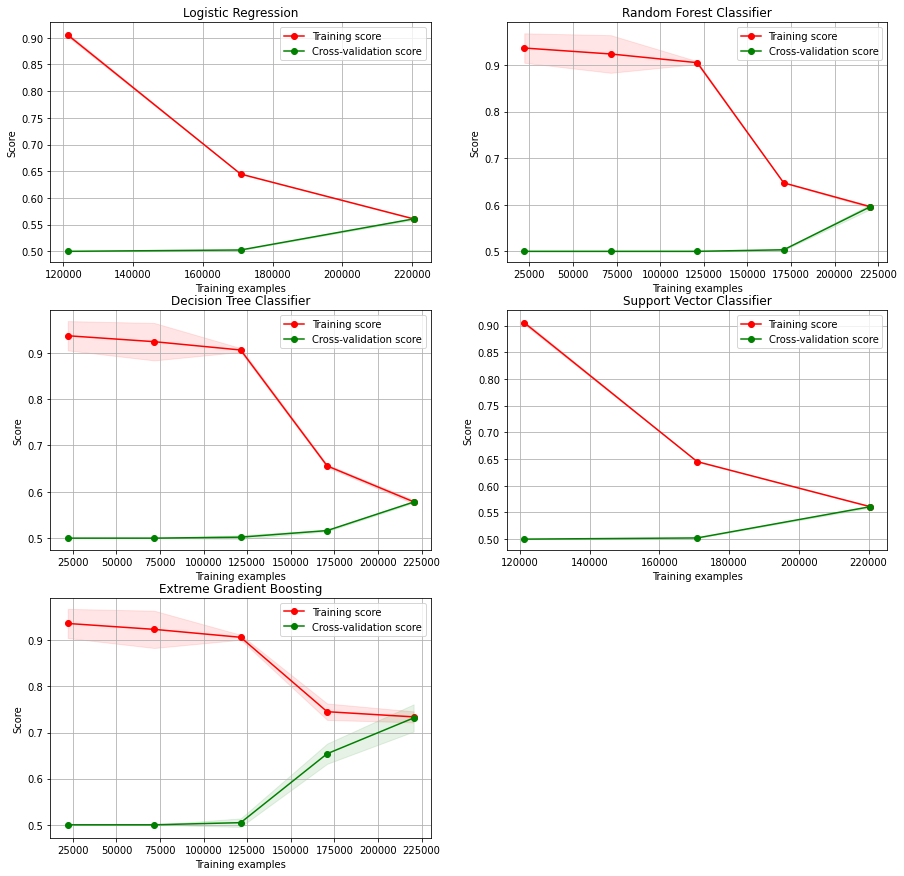

In [36]:
#Variables
n_jobs = 10
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

#Classifiers
log_reg = hyperparameter_tuned_classfier["Logistic Regression"]
svc = hyperparameter_tuned_classfier["Support Vector Classifier"]
decision_tree = hyperparameter_tuned_classfier["Decision Tree"]
RandomForest = hyperparameter_tuned_classfier["RandomForest"]
xgboost = hyperparameter_tuned_classfier["Gradient Boosting"]

#log_reg = randomsearch(LogisticRegression(), params['Logistic Regression'])
#svc = randomsearch(LinearSVC(), params['Support Vector Classifier'])
#decision_tree = randomsearch(DecisionTreeClassifier(), params['Decision Tree'])
#RandomForest = randomsearch(RandomForestClassifier(), params['RandomForest'])
#xgboost = randomsearch(XGBClassifier(), params['Gradient Boosting'])

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plot_learning_curve(log_reg, 'Logistic Regression', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,2)
plot_learning_curve(RandomForest, 'Random Forest Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,3)
plot_learning_curve(decision_tree, 'Decision Tree Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,4)
plot_learning_curve(svc, 'Support Vector Classifier', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

plt.subplot(3,2,5)
plot_learning_curve(xgboost, 'Extreme Gradient Boosting', X_train_SMOTE, y_train_SMOTE, n_jobs=-1)

#plt.show()

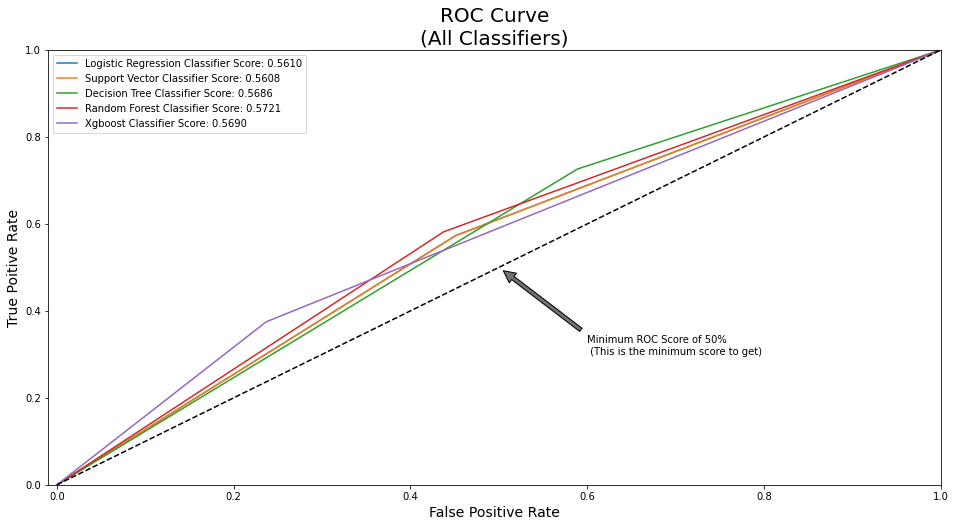

In [37]:
#ROC Curve
'''log_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5)
tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=5)
knear_pred = cross_val_predict(knearest, X_train, y_train, cv=5)'''

log_pred = log_reg.predict(X_test_stand)
svc_pred = svc.predict(X_test_stand)
tree_pred = decision_tree.predict(X_test_stand)
RandomForeest_pred = RandomForest.predict(X_test_stand)
Xgboost_pred = xgboost.predict(X_test_stand)

log_fpr, log_tpr, log_threshold = roc_curve(y_test, log_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, tree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_test, RandomForeest_pred)
xgboost_fpr, xgboost_tpr, xgboost_threshold = roc_curve(y_test, Xgboost_pred)

plt.figure(figsize=(16,8))
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_pred)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svc_pred)))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, tree_pred)))

plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, RandomForeest_pred)))
plt.plot(xgboost_fpr, xgboost_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, Xgboost_pred)))

plt.plot([0,1],[0,1],'k--')
plt.axis([-0.01, 1, 0, 1])

plt.title('ROC Curve\n(All Classifiers)', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Poitive Rate', fontsize=14)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

In [38]:
labels = ['Non-Default', 'Default']

print('Logistic Regression:')
print(classification_report(y_test, log_pred, target_names=labels))

print('Support Vector Classifier:')
print(classification_report(y_test, svc_pred, target_names=labels))

print('Decision Tree:')
print(classification_report(y_test, tree_pred, target_names=labels))

print('Random Forest Classifier:')
print(classification_report(y_test, RandomForeest_pred, target_names=labels))

print('Extreme Gradient Boosting Classifier:')
print(classification_report(y_test, Xgboost_pred, target_names=labels))

Logistic Regression:
              precision    recall  f1-score   support

 Non-Default       0.94      0.55      0.69     92034
     Default       0.10      0.57      0.16      7714

    accuracy                           0.55     99748
   macro avg       0.52      0.56      0.43     99748
weighted avg       0.87      0.55      0.65     99748

Support Vector Classifier:
              precision    recall  f1-score   support

 Non-Default       0.94      0.55      0.69     92034
     Default       0.10      0.57      0.16      7714

    accuracy                           0.55     99748
   macro avg       0.52      0.56      0.43     99748
weighted avg       0.87      0.55      0.65     99748

Decision Tree:
              precision    recall  f1-score   support

 Non-Default       0.95      0.41      0.57     92034
     Default       0.09      0.73      0.17      7714

    accuracy                           0.44     99748
   macro avg       0.52      0.57      0.37     99748
weighted av

In [39]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50555 41479]
 [ 3296  4418]]
Confusion matrix, without normalization
[[50532 41502]
 [ 3297  4417]]
Confusion matrix, without normalization
[[37840 54194]
 [ 2113  5601]]
Confusion matrix, without normalization
[[51777 40257]
 [ 3227  4487]]
Confusion matrix, without normalization
[[70247 21787]
 [ 4823  2891]]
Confusion matrix, without normalization
[[92034     0]
 [    0  7714]]


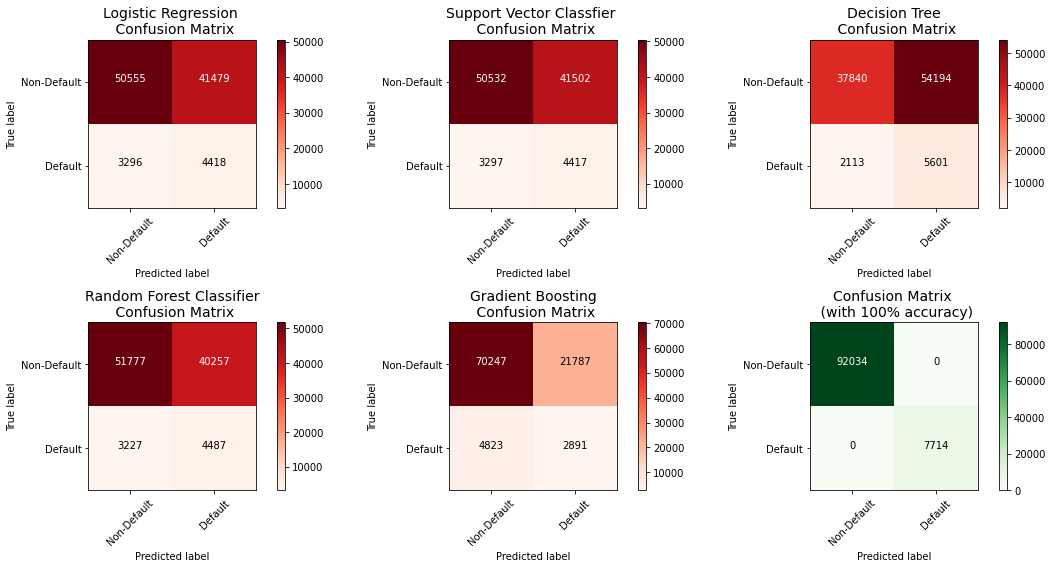

In [40]:
from sklearn.metrics import confusion_matrix
log_reg_cm = confusion_matrix(y_test, log_reg.predict(X_test_stand))
svc_cm = confusion_matrix(y_test, svc.predict(X_test_stand))
dt_cm = confusion_matrix(y_test, decision_tree.predict(X_test_stand))
RF_cm = confusion_matrix(y_test, RandomForest.predict(X_test_stand))
xgboost_cm = confusion_matrix(y_test, xgboost.predict(X_test_stand))

actual_cm = confusion_matrix(y_test, y_test)
labels = ['Non-Default', 'Default']


fig = plt.figure(figsize=(16,8))

fig.add_subplot(231)
plot_confusion_matrix(log_reg_cm, labels, title="Logistic Regression \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(232)
plot_confusion_matrix(svc_cm, labels, title="Support Vector Classfier \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(233)
plot_confusion_matrix(dt_cm, labels, title="Decision Tree\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(234)
plot_confusion_matrix(RF_cm, labels, title="Random Forest Classifier\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(235)
plot_confusion_matrix(xgboost_cm, labels, title="Gradient Boosting\n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(236)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.show()

Logistic - Regression Feature: 0, Score: 0.10294
Logistic - Regression Feature: 1, Score: 0.19873
Logistic - Regression Feature: 2, Score: -0.20001
[ 0.05125863  0.09928052 -0.09966456]
SVM: 0, Score: 0.05126
SVM: 1, Score: 0.09928
SVM: 2, Score: -0.09966
Decision Tree-Feature: 0, Score: 0.00000
Decision Tree-Feature: 1, Score: 0.62062
Decision Tree-Feature: 2, Score: 0.37938
Random Forest Feature: 0, Score: 0.20882
Random Forest Feature: 1, Score: 0.46438
Random Forest Feature: 2, Score: 0.32680
Extreme Gradient Boosting: 0, Score: 0.16530
Extreme Gradient Boosting: 1, Score: 0.74801
Extreme Gradient Boosting: 2, Score: 0.08669


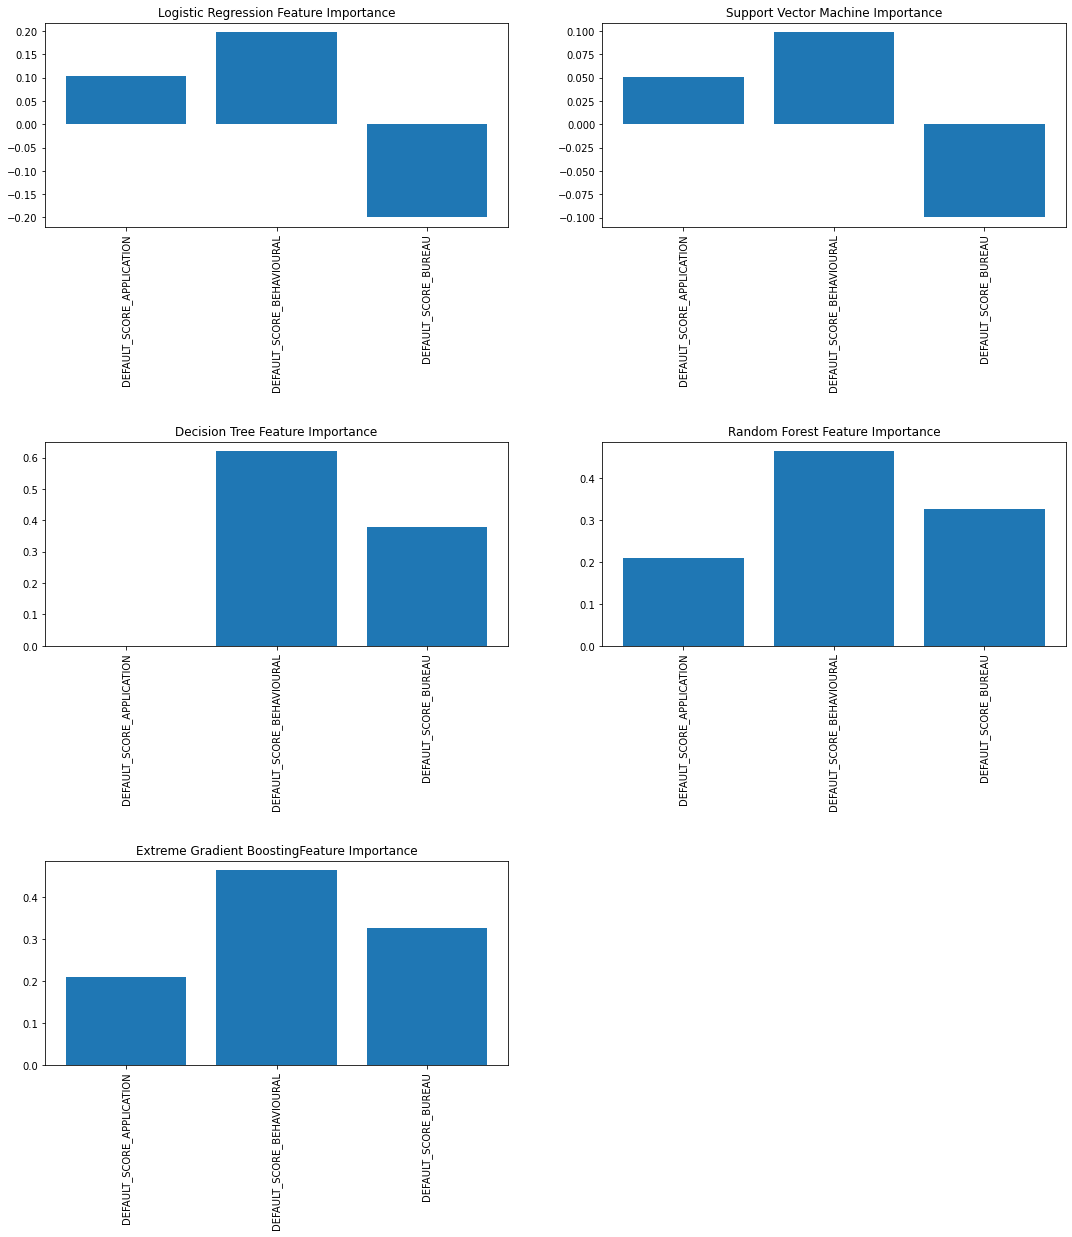

In [41]:
cols = list(X.columns)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
importance_log_reg = log_reg.coef_[0]

for i,v in enumerate(importance_log_reg):
    print('Logistic - Regression Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_log_reg)
plt.xticks(rotation = 90)
plt.title("Logistic Regression Feature Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,2)
importance_svc = svc.coef_[0]
print(importance_svc)
for i,v in enumerate(importance_svc):
    print('SVM: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_svc)
plt.xticks(rotation = 90)
plt.title("Support Vector Machine Importance")
plt.tight_layout(h_pad = 5, w_pad=5)

plt.subplot(3,2,3)
# get importance
importance_decision_tree = decision_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_decision_tree):
	print('Decision Tree-Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(cols, importance_decision_tree)
plt.xticks(rotation = 90)
plt.title("Decision Tree Feature Importance")

plt.subplot(3,2,4)
importance_RandomForest = RandomForest.feature_importances_
for i,v in enumerate(importance_RandomForest):
	print('Random Forest Feature: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Random Forest Feature Importance")

plt.subplot(3,2,5)
importance_Xgboost = xgboost.feature_importances_
for i,v in enumerate(importance_Xgboost):
	print('Extreme Gradient Boosting: %0d, Score: %.5f' % (i,v))

plt.bar(cols, importance_RandomForest)
plt.xticks(rotation = 90)
plt.title("Extreme Gradient BoostingFeature Importance")
plt.xticks(rotation = 90) 
plt.show()




In [42]:
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package

In [43]:
feature_names = X_train_SMOTE.columns

In [44]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_SMOTE.values, 
                                                   feature_names=feature_names, 
                                                   class_names=["Non Default", "Default"], 
                                                   verbose=True, mode='classification')

In [45]:
predict_fn_lg = lambda x: log_reg.predict_proba(x).astype(float)
predict_fn_svm = lambda x: svc._predict_proba_lr(x).astype(float)
predict_fn_dt = lambda x: decision_tree.predict_proba(x).astype(float)
predict_fn_rf = lambda x: RandomForest.predict_proba(x).astype(float)
predict_fn_xgboost = lambda x: xgboost.predict_proba(x).astype(float)

In [46]:
np.random.seed(1)
i = 19
exp_lg = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_lg, num_features=5)
exp_svm = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_svm, num_features=5)
exp_dt = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_dt, num_features=5)
exp_rf = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_rf, num_features=5)

exp_xgboost = explainer.explain_instance(X_train[feature_names].values[i], predict_fn_xgboost, num_features=5)
#exp_lg.show_in_notebook(show_all=False)

Intercept 0.53000057934618
Prediction_local [0.4514985]
Right: 0.37535070834290307
Intercept 0.5159503803505834
Prediction_local [0.47639011]
Right: 0.4367467203780801
Intercept 0.5002146178009836
Prediction_local [0.46691578]
Right: 0.44047787027891444
Intercept 0.5019803938026183
Prediction_local [0.45683176]
Right: 0.4344134318553129
Intercept 0.5605012222337685
Prediction_local [0.58038655]
Right: 0.5935793519020081


In [47]:
exp_lg.show_in_notebook()

In [48]:
exp_svm.show_in_notebook()

In [49]:
exp_dt.show_in_notebook()

In [50]:
exp_rf.show_in_notebook()

In [51]:
exp_xgboost.show_in_notebook()
